# Problem Set 5

## Attribute Selection & PCA

### Prem Shah

### INFX 574

This problem set uses the Boston Housing Prices Dataset and the below, we see the description of the attributes.


* a) **crim** - per capita crime rate by town.
* b) **zn** - proportion of residential land zoned for lots over 25,000 sq.ft.
* c) **indus** - proportion of non-retail business acres per town.
* d) **chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* e) **nox** - nitrogen oxides concentration (parts per 10 million).
* f) **rm** - average number of rooms per dwelling.
* g) **age** - proportion of owner-occupied units built prior to 1940.
* h) **dis** - weighted mean of distances to five Boston employment centres.
* i) **rad** - index of accessibility to radial highways.
* j) **tax** - full-value property-tax rate per 10,000 dollars.
* k) **ptratio** - pupil-teacher ratio by town.
* l) **black** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* m) **lstat** - lower status of the population (percent).
* n) **medv** - median value of owner-occupied homes in 1000s.


### Collaborated with: Manasi Kulkarni, Aditya Wakade, Pratik Damania, Gaurav Gohil

In [271]:
from sklearn.datasets import load_boston, load_breast_cancer, load_linnerud, load_iris, load_wine
import pandas as pd
import time
from collections import OrderedDict
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,auc,mean_squared_error,r2_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from random import seed,randrange
from sklearn.decomposition import PCA
from patsy import dmatrices
from scipy.misc import factorial

## 1. Active Data Exploration

### 1.1 Load the data

In [287]:
#Load the boston dataset
boston_data = load_boston()

In [288]:
#Make dataframe
data = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [289]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [290]:
input_data = data

### 1.2 Adding some engineered features

* a) **crim** - per capita crime rate by town.
* b) **zn** - proportion of residential land zoned for lots over 25,000 sq.ft.
* c) **indus** - proportion of non-retail business acres per town.
* d) **chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* e) **nox** - nitrogen oxides concentration (parts per 10 million).
* f) **rm** - average number of rooms per dwelling.
* g) **age** - proportion of owner-occupied units built prior to 1940.
* h) **dis** - weighted mean of distances to five Boston employment centres.
* i) **rad** - index of accessibility to radial highways.
* j) **tax** - full-value property-tax rate per 10,000 dollars.
* k) **ptratio** - pupil-teacher ratio by town.
* l) **black** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* m) **lstat** - lower status of the population (percent).
* n) **medv** - median value of owner-occupied homes in 1000s.

In [291]:
#Add some engineered features from the variables above
data['e1'] = data['AGE']*data['PTRATIO']/100
data['e2'] = data['RM']/data['RAD']
data['e3'] = data['NOX']/data['RM']
data['e4'] = np.log2(data['TAX'])
data['e5'] = data['LSTAT']*data['B']/data['TAX']
data['e6'] = data['AGE']/data['RM']
data['e7'] = data['INDUS']/data['RAD']
data['e8'] = data['CRIM']*100/data['PTRATIO']
data['e9'] = np.log2(data['B'])
data['e10'] = data['LSTAT']*data['RAD']

#y, X = dmatrices(boston_data.target, boston_data.data, return_type="matrix")

### 1.3 Adding some bogus features

In [292]:
data['b1'] = np.random.randint(10,size=len(data))
data['b2'] = np.random.rand(len(data))
data['b3'] = load_breast_cancer().data[0:506,2]
data['b4'] = load_breast_cancer().data[0:506,5]
data['b5'] = load_breast_cancer().data[0:506,1]
data['b6'] = load_breast_cancer().data[0:506,4]
data['b7'] = load_breast_cancer().data[0:506,6]
data['b8'] = np.log1p(np.random.randint(1,1500, size = 506))
data['b9'] = np.sqrt(np.random.randint(1,500, 506))
data['b10'] = np.random.randint(1, 2, 506) * np.random.randint(2,5, 506)

In [293]:
np.shape(data)

(506, 33)

In [294]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,1,0.507871,122.80,0.27760,10.38,0.11840,0.3001,5.971262,9.591663,4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,5,0.898752,132.90,0.07864,17.77,0.08474,0.0869,5.680173,14.387495,3
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,5,0.056484,130.00,0.15990,21.25,0.10960,0.1974,7.271009,12.409674,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,8,0.677370,77.58,0.28390,20.38,0.14250,0.2414,4.615121,17.435596,4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,6,0.861037,135.10,0.13280,14.34,0.10030,0.1980,6.381816,7.549834,2


In [295]:
#Make another dataframe copy to be used further in models. The previous dataframe will be used for summary statistics
input_data_without_target = data.copy()

In [296]:
#Add target variable for summary statistics
data['MEDV'] = pd.Series(list(boston_data.target))

In [297]:
input_data_without_target.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,1,0.507871,122.80,0.27760,10.38,0.11840,0.3001,5.971262,9.591663,4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,5,0.898752,132.90,0.07864,17.77,0.08474,0.0869,5.680173,14.387495,3
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,5,0.056484,130.00,0.15990,21.25,0.10960,0.1974,7.271009,12.409674,3
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,8,0.677370,77.58,0.28390,20.38,0.14250,0.2414,4.615121,17.435596,4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,6,0.861037,135.10,0.13280,14.34,0.10030,0.1980,6.381816,7.549834,2


### 1.4 Summary statistics


In [298]:
def summary_statistics(data):
    
    """
    Function to calculate summary statistics of the data
    
    Input:
    
    data: dataframe for which summary statistics is needed.
    
    Output:
    
    Dataframe with summary statistics
    """
    
    #Calculate summary statistics of the data
    summary = data.describe()
    missing_values = pd.isnull(data).sum(axis=0)

    #Remove variables not needed in summary statistics
    columns = summary.columns
    summary = summary[columns].T

    #Extract mean and standard deviation
    mean = summary['mean']
    std = summary['std']
    data_range = summary['max'] - summary['min']
    correlation = data.corr()['MEDV']

    #Print the summary statistics
    summary = pd.concat([mean,std,data_range,missing_values,correlation],axis=1)
    summary.columns = ['mean','std','range','missing values',"correlation"]
    return summary

In [299]:
summary_statistics(data)

,mean,std,range,missing values,correlation
CRIM,3.593761,8.596783,88.969880,0,-0.385832
ZN,11.363636,23.322453,100.000000,0,0.360445
INDUS,11.136779,6.860353,27.280000,0,-0.483725
CHAS,0.069170,0.253994,1.000000,0,0.175260
NOX,0.554695,0.115878,0.486000,0,-0.427321
RM,6.284634,0.702617,5.219000,0,0.695360
AGE,68.574901,28.148861,97.100000,0,-0.376955
DIS,3.795043,2.105710,10.996900,0,0.249929
RAD,9.549407,8.707259,23.000000,0,-0.381626
TAX,408.237154,168.537116,524.000000,0,-0.468536


### 1.5 Graphical Exploration

In [301]:
highly_correlated_features = ['RM','LSTAT','PTRATIO','b1','CHAS','e7']
color_dic = {1:'red', 0:'green'}


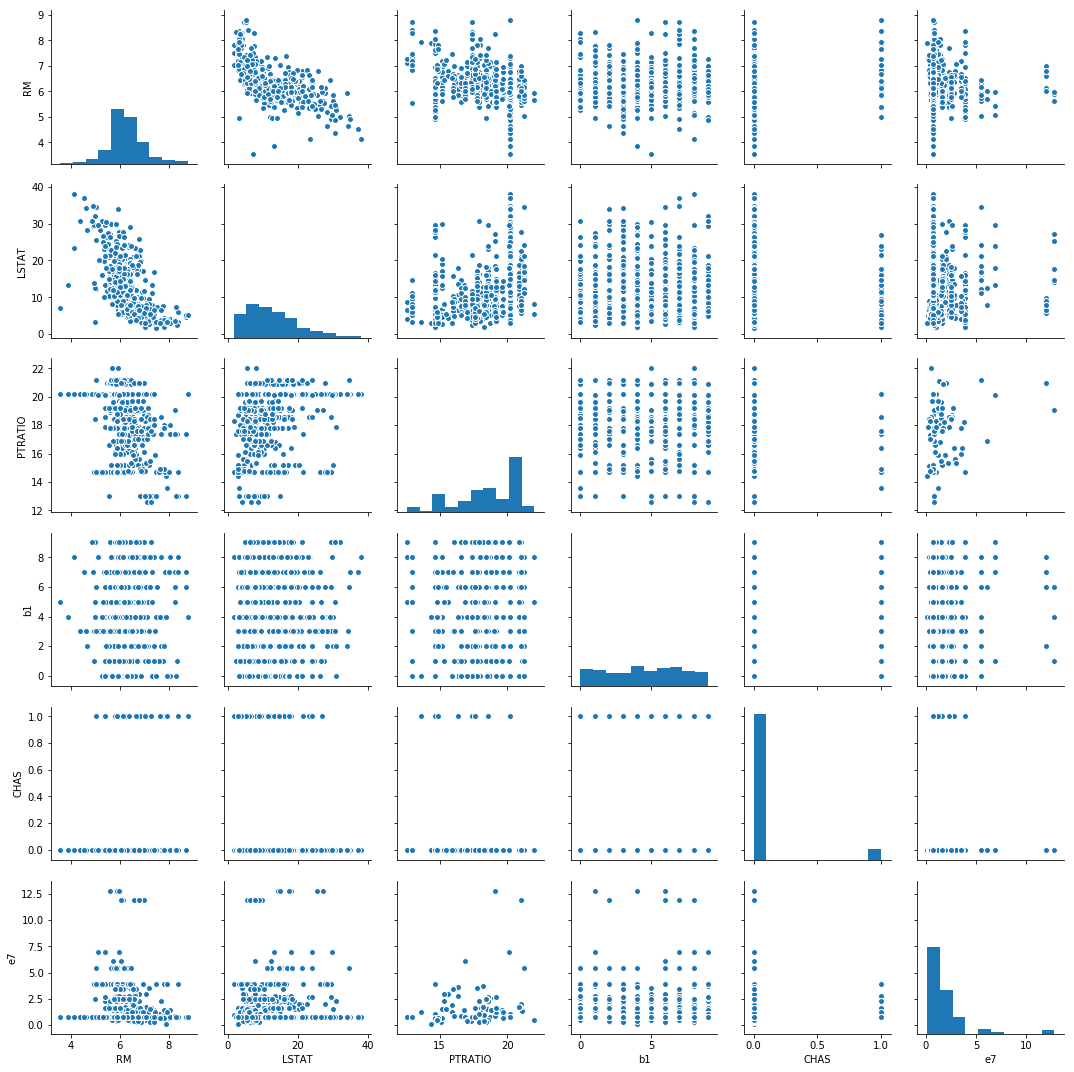

In [302]:
sns.pairplot(data[highly_correlated_features])
#sm = pd.plotting.scatter_matrix(data[highly_correlated_features], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

## 2. Warm Up: A few simple models

### 2.1 Loss function & k-fold CV function

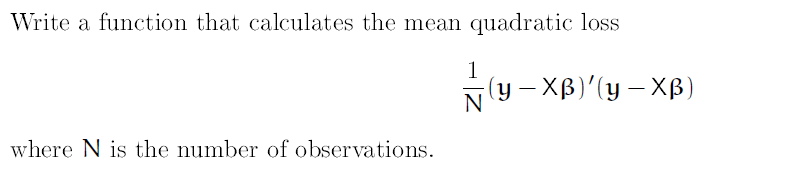

In [303]:
def compute_mean_squared_error(model,test_data,target_output):
    
    """
    Function to calculate mean squared error of model
    
    Input:
    
    model: trained model through scikit-learn
    test_data: Testing data for the model
    target_output: The actual values of the output 
    
    Output:
    
    mse: The mean squared error of the model predictions
    """
    
    #Calculate predicted values
    predicted = test_data@model.coef_ + model.intercept_
    difference = (target_output - predicted)
    difference_transpose = (target_output - predicted).T
    mse = np.dot(difference_transpose,difference).mean()/len(predicted)
    return mse

In [304]:
def perform_kfolds_validation (data,nfolds,model):
    
    """
    Function to perform k-fold validation on data
    
    Inputs:
    
    nfolds: No. of folds for the cross validation
    data: Dataframe on which cross validation has to be performed
    model: Model 
    
    Outputs:
    
    average_mse: Average value of mean squared error over k-fold CV
    results: Dataframe with rsquared error and loss for each fold
    """
    
    #Calculate length of input data and divide by number of folds
    nrows = len(data)
    set_nrows = nrows//nfolds
    
    #Shuffle the data for randomness in selection
    indexes = np.array(data.index)
    np.random.shuffle(indexes)
    
    #Define list for mse
    calc_mse = []
    r2 = []
    fold = []
    results = pd.DataFrame(columns = ['Fold', 'MSE', 'R-squared'])
    #partition the dataset into nfolds -1 for training sets. Append each fold in the list
    for i in range(0,nfolds):
        #Define start and end index
        start_index = int(i*set_nrows)
        end_index = int(start_index + set_nrows)
        
        #Divide into test and train data    
        test_indexes = indexes[start_index:end_index]
        test_data = data.loc[test_indexes,:]
        train_data = data.loc[~data.index.isin(test_indexes),:]
        
        #Divide outputs and input data
        train_x = train_data.drop('MEDV',axis=1)
        train_y = train_data['MEDV']
        test_x = test_data.drop('MEDV',axis=1)
        test_y = test_data['MEDV']
        
        #Fit the model on training data
        model.fit(train_x,train_y)
        
        #Give predictions
        predictions = model.predict(test_x)
        
        #Append error & r-squared to the list
        calc_mse.append(compute_mean_squared_error(model,test_x,test_y))
        r2.append(r2_score(test_y, predictions))
        fold.append(i+1)
    
    results['Fold'] = fold
    results['MSE'] = calc_mse
    results['R-squared'] = r2
    average_mse = np.mean(calc_mse)
    #print("Training set size for each fold:",train_data.shape[0])
    #print("Training set size for each fold:",test_data.shape[0])
        
    return average_mse,results

### 2.2 A few simple regressions

#### 2.2.1 Initial model (with 2 features)

In [305]:
columns = ['RM','LSTAT']
#Split the input data into training and testing
X_train, X_test, y_train, y_test = train_test_split (data[columns],boston_data.target, train_size = 0.75)

#Check the shapes of the train and test data
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(379, 2)
(379,)
(127, 2)
(127,)


In [306]:
model = LinearRegression(n_jobs=10,normalize=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
coefficients = model.coef_

In [307]:
model.score(X_test,y_test)

0.555696041166944

In [308]:
print(compute_mean_squared_error(model,X_test,y_test))

41.24799281758559


#### 2.2.2 k-fold Cross Validation

In [309]:
columns = ['RM','LSTAT','MEDV']
average_mse,list_of_mse = perform_kfolds_validation(data[columns],10,model)

In [310]:
list_of_mse

,Fold,MSE,R-squared
0,1,24.218092,0.775221
1,2,23.578351,0.754506
2,3,40.044633,0.499067
3,4,14.712745,0.666969
4,5,43.397646,0.581905
5,6,23.739358,0.698019
6,7,45.921949,0.477080
7,8,46.486492,0.587329
8,9,32.343988,0.422609
9,10,21.294335,0.662755


In [311]:
average_mse

31.573758868105113

#### 2.2.3 10-features

In [530]:
#Selecting 
data2 = data.iloc[:,[0,1,2,4,5,10,12,18,19,24,27]]

In [531]:
X_train, X_test, y_train, y_test = train_test_split (data2,boston_data.target, train_size = 0.75)

#Check the shapes of the train and test data
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(379, 11)
(379,)
(127, 11)
(127,)


In [532]:
model = LinearRegression(n_jobs=10,normalize=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
coefficients = model.coef_

In [315]:
model.score(X_test,y_test)

0.5902318436339655

In [316]:
print(compute_mean_squared_error(model,X_test,y_test))

27.521998829585637


#### k-fold cross validation of 10-feature model

In [320]:
#Selecting 10 features plus the target variable
data2 = data.iloc[:,[0,1,2,4,5,10,12,18,19,22,24,33]]

In [321]:
average_mse,results = perform_kfolds_validation(data2,10,model)

In [322]:
results

,Fold,MSE,R-squared
0,1,20.893640,0.778783
1,2,21.560774,0.745211
2,3,36.667751,0.443600
3,4,43.559896,0.479446
4,5,29.101872,0.329884
5,6,19.276103,0.751545
6,7,18.628112,0.776333
7,8,16.693346,0.802789
8,9,17.112184,0.836740
9,10,48.852256,0.573814


In [323]:
average_mse

27.234593465440145

#### 2.2.4 All features 

In [533]:
X_train, X_test, y_train, y_test = train_test_split (input_data_without_target,boston_data.target, train_size = 0.75)

#Check the shapes of the train and test data
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(379, 33)
(379,)
(127, 33)
(127,)


In [534]:
model = LinearRegression(n_jobs=10,normalize=True)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
coefficients = model.coef_

In [535]:
model.score(X_test,y_test)

0.7083059763896945

In [536]:
print(compute_mean_squared_error(model,X_test,y_test))

23.593378392932276


#### k-fold cross validation of full model

In [328]:
average_mse,list_of_mse = perform_kfolds_validation(data,10,model)

In [329]:
list_of_mse

,Fold,MSE,R-squared
0,1,46.796099,0.624064
1,2,10.761185,0.879908
2,3,16.241135,0.786233
3,4,18.710806,0.699529
4,5,15.468796,0.799574
5,6,10.562511,0.790936
6,7,16.767194,0.799008
7,8,17.025689,0.788440
8,9,19.075289,0.801271
9,10,12.331851,0.835681


In [330]:
average_mse

18.37405568533077

#### 2.2.5 Comparison and Inference

Here, we see that in the full model despite of there being some dummy variables does a pretty good job of minimizig the error and can explain many parts of the data well as seen by the R-squared values. Hence, we should opt for the full model

## 3. Find the best model

### 3.1 Evaluation of all the models

#### 3.1.1 Total number of regression models possible

Here, we know that including the generated models, we have 34 input parameters for the model. Now, if we consider all possible arrangements, the number of possible models will be 34! but here, arrangements of difference variables are the same and hence we do not treat them as different. So, we need to look at combinations.

Therefore, total combinations = Sum of (n,k) for 0<=k<=n = power(2,n)

Here, we need to ignore the k=0 instance because we need at least one input parameter. 

There, total possible combinations = power(2,n) - 1

In [331]:
#Total possible combinations
combinations = pow(2,34) - 1
combinations

17179869183

### 3.1.2 Running a small test

Here, we first create a function to randomly select number of features from the data and train a model. Then we perform k-fold validation on the same model.

After that, we measure the time taken to do 110 such cross-validations. We do that 10 times, which can help us in giving a ballpark figure on the average time it will take for 110 such cross validations.


In [336]:
def random_feature_selection(data):
    """
    Function to randomly generate a set of features from the given data
    
    Input:
    
    data: dataset to perform random feature selection on
    
    Output:
    None
    """
    i=0
    for i in range(0,110):
        number = np.random.randint(33)
        temp_data = data.sample(number+1,axis=1)
        temp_data['MEDV'] = boston_data.target
        model = LinearRegression(n_jobs=10,normalize=True)
        aver_mse, mse = perform_kfolds_validation(temp_data,10,model)
        i=i+1
    return 'Done'

In [337]:
timings = []
i=0
for i in range(0,10):
    start_time = time.time()
    random_feature_selection(input_data_without_target)
    time_taken = time.time() - start_time
    timings.append(time_taken)
    
    i+=1

In [338]:
np.mean(timings)

6.728317999839783

Here, we see that the mean timings for 10 such loops is 6.72 seconds for 110 random feature selection dataframes. Now we have 17179869183 total possible combinations of features. 

In [339]:
total_time = (combinations/110)*np.mean(timings)
print("Total time taken for all possible combinations will be",total_time,"seconds")

Total time taken for all possible combinations will be 1050832936.8988335 seconds


Hence, we cannot run all combinations and store them in memory at the same time. We need to optimize our method of feature selection through some importance metric

### 3.2 Forward Selection

#### 3.2.1 Reading

#### 3.2.2 Create a series of 1-feature models

#### 3.2.3 Pick feature with lowest loss

#### 3.2.4 Repeat procedure with more features



In [353]:
def select_best_feature(added_features, remaining_features):
    """
    Function to select best feature based on minimum Mean square error encountered when added to the model
    
    Input:
    
    added_features: The features already added to the model
    remaining_features: The features from the dataset yet to be added to the model
    
    Output:
    
    result: The feature from the remaining list which on being added to the model gets the minimum Loss/MSE
    """
    
    best_feature_results = pd.DataFrame(columns = ['MSE', 'feature', 'R-squared'])
    
    for feature in remaining_features:
        #Add each feature from the remaining list and check which one makes the most difference in minimizing the loss
        model = LinearRegression()
        
        #Perform k-fold validation to get the mean loss and r-squared
        a,results = perform_kfolds_validation(data[added_features + [feature] +['MEDV']], 10, model)
        idx = len(best_feature_results) + 1
        
        #Store the results for each variable
        best_feature_results.loc[idx] = [results['MSE'].mean(), feature, results['R-squared'].mean()]
    
    # We select the best model based on minimizing the loss of the model
    return(best_feature_results[best_feature_results['MSE'] == (best_feature_results['MSE']).min()])

#### 3.2.5 Pick the best model

In [354]:
features = list(data.drop("MEDV", axis = 1).columns)
added_features = []
forward_selection_results = pd.DataFrame(columns = ['Features','Average R-squared'])

for i in range(0,len(data.columns)-1):

    #Print selected features
    print("_______________________________________________________________________________________________________________")
    print(added_features)
   
    #Run the select best feature function
    f = select_best_feature(added_features, features)
    print(f)
    # Add the feature to list
    added_features.append(f['feature'].item())
    
    #Remove used from list of features
    features.remove(f['feature'].item())
    
    #Perform k-fold validation and get average R-squared for each model
    model = LinearRegression()
    a,x = perform_kfolds_validation(data[forward_list + ['MEDV']],10,model)
    
    print("R_squared value for this model",np.mean(x['R-squared']))

_______________________________________________________________________________________________________________
[]
          MSE feature  R-squared
13  39.042198   LSTAT   0.520871
R_squared value for this model 0.7801657236778016
_______________________________________________________________________________________________________________
['LSTAT']
         MSE feature  R-squared
6  31.213653      RM   0.633025
R_squared value for this model 0.7910720423118606
_______________________________________________________________________________________________________________
['LSTAT', 'RM']
          MSE  feature  R-squared
10  27.860053  PTRATIO   0.662386
R_squared value for this model 0.7379254413396554
_______________________________________________________________________________________________________________
['LSTAT', 'RM', 'PTRATIO']
          MSE feature  R-squared
16  26.175337      e6   0.676138
R_squared value for this model 0.7761901255619075
________________________________

        MSE feature  R-squared
6  18.39277      b8    0.78725
R_squared value for this model 0.7800747391404783
_______________________________________________________________________________________________________________
['LSTAT', 'RM', 'PTRATIO', 'e6', 'AGE', 'b4', 'CHAS', 'TAX', 'e8', 'e9', 'b5', 'RAD', 'b6', 'DIS', 'NOX', 'CRIM', 'B', 'e5', 'b3', 'b9', 'INDUS', 'b1', 'b7', 'ZN', 'e4', 'e2', 'b8']
         MSE feature  R-squared
4  17.713929     e10   0.792085
R_squared value for this model 0.7916398985863058
_______________________________________________________________________________________________________________
['LSTAT', 'RM', 'PTRATIO', 'e6', 'AGE', 'b4', 'CHAS', 'TAX', 'e8', 'e9', 'b5', 'RAD', 'b6', 'DIS', 'NOX', 'CRIM', 'B', 'e5', 'b3', 'b9', 'INDUS', 'b1', 'b7', 'ZN', 'e4', 'e2', 'b8', 'e10']
         MSE feature  R-squared
5  17.311623     b10   0.793888
R_squared value for this model 0.7667363877748489
_________________________________________________________________

From the above results, we see that the R-squared value is highest when we have 26 features. They are:

['LSTAT', 'RM', 'PTRATIO', 'e6', 'AGE', 'b4', 'CHAS', 'TAX', 'e8', 'e9', 'b5', 'RAD', 'b6', 'DIS', 'NOX', 'CRIM', 'B', 'e5', 'b3', 'b9', 'INDUS', 'b1', 'b7', 'ZN', 'e4', 'e2', 'b8']


## 4. Principal Components


### 4.1 Use Raw features

#### 4.1.1 Reading

#### 4.1.2 Perform PCA and extract variance

In [561]:
def principal_components_analysis(data):
    """
    Function to perform principal components analysis
    
    Input:
    
    data: Dataframe to perform PCA on without target
    
    Output:
    
    results: model, variance, explained variance, cumulative variance
    """
    cumulative_variance = {}


    for p in range(len(data.columns)):
        #Build PCA model for increasing number of components
        pca_model=PCA(n_components=p+1)
        pca_model.fit(data)
        
        #Calculate proportional and cumulative variance
        proportional_variance=pca_model.explained_variance_ratio_
        var[p+1]=np.sum(pca_model.explained_variance_ratio_)
    
    #Print results
    print('The variance explained for each component is: \n')
    print(pca_model.explained_variance_)
    print('\n')

    print('The proportion of variance explained by each component is:\n')
    print(proportional_variance)
    print('\n')

    print('The cumulative variance for all the components is: \n')
    print(var)
    
    return(pca_model)

In [562]:
model = principal_components_analysis(input_data_without_target)

The variance explained for each component is: 

[6.50629561e+04 6.28083034e+03 5.35912805e+03 1.00892258e+03
 8.48504139e+02 5.68350114e+02 2.69484010e+02 4.68911102e+01
 2.64983301e+01 1.58352465e+01 1.25381690e+01 9.05811113e+00
 8.04388661e+00 5.00566570e+00 2.06084343e+00 1.52096762e+00
 1.19939415e+00 8.45303751e-01 6.89332819e-01 6.13895389e-01
 2.80627665e-01 2.12843762e-01 1.57845137e-01 7.65317432e-02
 5.72067773e-02 5.10532133e-02 1.08517363e-02 4.74090846e-03
 3.13393987e-03 2.10427862e-03 3.70004289e-04 8.84175500e-05
 2.89291440e-06]


The proportion of variance explained by each component is:

[8.18094967e-01 7.89745194e-02 6.73851289e-02 1.26860895e-02
 1.06690044e-02 7.14637631e-03 3.38846443e-03 5.89604032e-04
 3.33187297e-04 1.99110773e-04 1.57653657e-04 1.13895765e-04
 1.01143009e-04 6.29407295e-05 2.59128349e-05 1.91244916e-05
 1.50810596e-05 1.06287631e-05 8.66760048e-06 7.71905794e-06
 3.52858361e-06 2.67627574e-06 1.98472863e-06 9.62302324e-07
 7.19312177e-07 6.4

#### 4.1.3 Rotate the data

In [564]:
#Convert into dataframe
rotated_data = input_data_without_target @ model.components_
rotated_data=pd.DataFrame(rotated_data)

In [565]:
rotated_data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.920193,80.155943,243.355590,-40.151961,-0.054937,114.833147,27.819138,-3.362279,287.177398,-23.430212,...,-15.256762,-2.114973,16.044115,1.775888,-233.971876,-9.523100,9.042907,-11.533393,-35.713486,-0.984423
1,-3.122700,88.989677,214.133059,-43.671127,0.414430,120.785560,38.161878,2.542186,294.098134,-18.430875,...,-18.391090,1.245487,12.715340,7.407336,-194.349242,-13.253852,14.554316,-19.253411,-30.294765,-0.895440
2,-1.575937,74.906264,213.770957,-43.324053,0.147895,119.595321,25.973745,0.164752,290.051332,-18.141498,...,-12.900482,1.642650,14.588097,7.713464,-194.401866,-11.225930,18.261788,-11.337725,-30.496097,0.833003
3,-0.397787,62.423869,203.926016,-23.032937,0.419327,74.532533,18.434637,-0.334986,293.101006,-14.270333,...,-11.091603,5.775682,14.435607,10.954649,-180.296008,-15.617259,16.612100,-10.450791,-29.200873,-0.317640
4,-2.667848,69.027644,204.142393,-44.480380,0.358917,122.374238,23.040714,1.631141,294.496122,-14.301585,...,-13.587608,2.193190,14.084378,3.231596,-180.264591,-7.188395,12.410984,-14.766876,-29.056444,0.030436


#### 4.1.3 Find optimal model in rotated data

In [566]:
columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
res = {}

for i in range(1,34):
    #Define the model
    model = LinearRegression(n_jobs=10,normalize=True)
    
    #Perform k-folds validation
    x = rotated_data[columns[0:i]]
    x['MEDV'] = boston_data.target
    
    #Store the results
    a,results = perform_kfolds_validation(x,10,model)
    res[i] = a

c:\users\iguest\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [567]:
results

,Fold,MSE,R-squared
0,1,25.390788,0.806619
1,2,18.096116,0.750889
2,3,17.913848,0.836897
3,4,21.985260,0.755965
4,5,24.746437,0.692059
5,6,20.591525,0.631277
6,7,6.241583,0.916848
7,8,11.253236,0.833859
8,9,14.548832,0.726385
9,10,26.103649,0.701599


In [568]:
print("The average MSE is:",a)

The average MSE is: 18.687127501005616


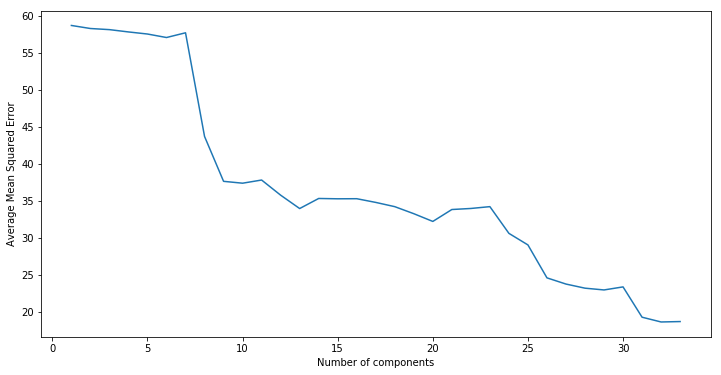

In [570]:
plt.figure(figsize=(12, 6))
plt.plot(res.keys(),res.values())
plt.ylabel("Average Mean Squared Error")
plt.xlabel("Number of components")
plt.show()

Here, we can see the best MSE we get at maximum number of components: 33

### 4.2 PCA on normalized data

#### 4.2.1 Normalize the data

In [571]:
def normalize_data(feature):
    """
    Function to normalize data
    """
    mean = feature.mean()
    sd = np.std(feature)
    normalized_feature = (feature-mean)/sd
    return normalized_feature

In [572]:
normalized_data = normalize_data(input_data_without_target)

#### 4.2.2 Repeat the analysis

In [573]:
model = principal_components_analysis(normalized_data)

The variance explained for each component is: 

[1.06194639e+01 3.42545004e+00 2.74985564e+00 1.60735916e+00
 1.47525588e+00 1.25782095e+00 1.16137756e+00 1.12098036e+00
 1.06294561e+00 1.02098916e+00 9.54819528e-01 9.12068037e-01
 8.94746110e-01 8.25157361e-01 7.47194906e-01 6.78938256e-01
 5.57977116e-01 4.45243817e-01 3.69817608e-01 2.56067113e-01
 2.48746145e-01 1.87852496e-01 1.35797800e-01 1.24615585e-01
 8.07191665e-02 6.94968958e-02 3.95344951e-02 1.79593335e-02
 7.88143045e-03 4.19796603e-03 3.73174167e-03 1.22377026e-03
 6.15443436e-05]


The proportion of variance explained by each component is:

[3.21165966e-01 1.03596375e-01 8.31642770e-02 4.86115927e-02
 4.46163743e-02 3.80404587e-02 3.51237076e-02 3.39019693e-02
 3.21468161e-02 3.08779212e-02 2.88767434e-02 2.75838040e-02
 2.70599345e-02 2.49553520e-02 2.25975223e-02 2.05332267e-02
 1.68749817e-02 1.34655724e-02 1.11844467e-02 7.74427429e-03
 7.52286520e-03 5.68124988e-03 4.10695227e-03 3.76876695e-03
 2.44120129e-03 2.1

In [574]:
#Rotate the data
rotated_data = dR = normalized_data @ model.components_
rotated_data=pd.DataFrame(rotated_data)

In [575]:
rotated_data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.245047,-1.068079,-1.759578,0.866339,0.764835,-0.532455,-0.709354,0.463312,0.024153,0.996826,...,-0.796865,-2.799206,1.085126,-0.737533,-0.517178,-1.797214,-0.351385,-0.065208,-1.272896,-1.029767
1,0.663390,-0.453360,0.098747,0.608221,-0.238131,-0.088329,-0.217206,0.411839,-0.701230,-0.692672,...,0.362497,-0.729252,0.342695,-1.104136,-0.570087,-1.630757,0.826419,-0.071562,-0.182690,-0.990144
2,1.088419,-0.594666,-0.537801,0.085010,-0.380134,0.942512,-0.044211,0.366664,0.279844,0.866363,...,0.715872,-1.240710,0.907322,0.848271,-1.016034,-1.691879,-1.240137,-0.738021,-0.230389,-0.728190
3,-0.056246,-0.372847,-2.196513,-0.535834,-0.848280,0.486419,-0.854562,-0.029294,2.313035,1.196962,...,1.367168,-1.229079,0.917917,-1.705429,-1.220325,-0.989231,-0.318466,-0.972811,0.338240,-0.159923
4,1.651032,-0.373820,-0.241356,-0.156425,0.531751,-0.181908,-0.332710,0.217966,-0.370906,0.554564,...,1.311463,-0.936551,0.762596,-1.918524,-1.258950,-0.729351,-0.103337,-0.911673,0.260878,-0.345280


In [576]:
columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
res = {}

for i in range(1,34):
    #Define the model
    model = LinearRegression(n_jobs=10,normalize=True)
    
    #Perform k-folds validation
    x = rotated_data[columns[0:i]]
    x['MEDV'] = boston_data.target
    
    #Store the results
    a,results = perform_kfolds_validation(x,10,model)
    res[i] = a

c:\users\iguest\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [577]:
results

,Fold,MSE,R-squared
0,1,12.563039,0.819715
1,2,20.840133,0.726210
2,3,20.507368,0.759711
3,4,23.571284,0.803088
4,5,11.575023,0.847789
5,6,9.508369,0.863862
6,7,20.242717,0.797581
7,8,14.660672,0.803428
8,9,12.174838,0.669296
9,10,39.421362,0.655669


In [578]:
print("The average MSE is:",a)

The average MSE is: 18.506480501685655


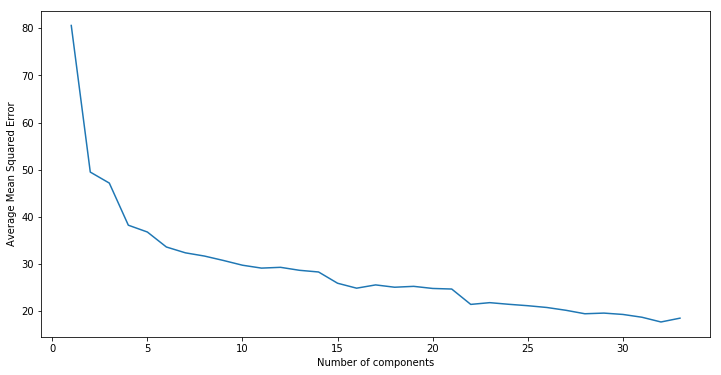

In [580]:
plt.figure(figsize=(12, 6))
plt.plot(res.keys(),res.values())
plt.ylabel("Average Mean Squared Error")
plt.xlabel("Number of components")
plt.show()

From the above results, we see that we get the best MSE for normalized PCA with all the components. Also, while forward selection works very well, it is much more time consuming when you have greater than 50-60 features